<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/Water_Level_and_cap_level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Links to the images used:

*   coke: https://drive.google.com/file/d/16W_CAvnW2qWJdD3kBycimnwxQwwKzi3_/view?usp=sharing
*   test_coke: https://drive.google.com/file/d/1xYM2BqmICmimJEuezpnq1Xp9BIsrBctM/view?usp=sharing
*   full_coke: https://drive.google.com/file/d/1N1o4bTnOZ3gU-grPqfhDIOGAmxQsX_X0/view?usp=sharing
*   fuly_closed: https://drive.google.com/file/d/15to-gFbHrZ8uQZEsKgADzb9aoY74SyXp/view?usp=sharing
*   wide_open: https://drive.google.com/file/d/1M2gXuFFWlG27f63eWIBl-GDYg3J3LPyt/view?usp=sharing
*   almost_closed: https://drive.google.com/file/d/1AKzMgKNR7svaUCeOuYxEjRdFhyKqDLM1/view?usp=sharing
*   fully_closed_cap1: https://drive.google.com/file/d/1On7mA1UNrpEHCP_0k595GGur_N59tfRR/view?usp=sharing







In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [0]:
def cropped_object_detection(image, template, width=500, height=500):

    ## Detects the object using template matching.
  
    result=cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
    print(' Accuracy: ', max_val, '\n Location: ', max_loc)
    
    top_left=max_loc
    bottom_right=(top_left[0]+width, top_left[1]+height)
    detected=cv2.rectangle(image.copy(), top_left, bottom_right, (0,0,255), 4)

    cv2_imshow( detected)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows() 
    
    cropped=image[ top_left[1]:top_left[1]+height, top_left[0]:top_left[0]+width]
    cv2_imshow(cropped)
    
    return cropped 


def gray(image):
  ## Converts the image into gray scale image
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def draw_rectangle(image,  left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100)):
  ## Draws rectangle ove the image using the co-ordinate points.
  return cv2.rectangle(image.copy(), left_top_coordinate, right_bottom_coordinate, (0,0,255), 1)


def crop_the_area(image, left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100)):
  ## crops out the required area.
  return image[ left_top_coordinate[1]:right_bottom_coordinate[1], left_top_coordinate[0]:+right_bottom_coordinate[0]]


def template_matching(image, template):
  ## Pixel by pixel evaluation for matching the two templates.
  result=cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
  min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
  return max_val


def histogram(image_gray):
  
  ## histogram for gray scale images
  hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
  
  # uncomment to get the graph
  
  #plt.figure()
  #plt.title("Grayscale Histogram")
  #plt.xlabel("Bins")
  #plt.ylabel("# of Pixels")
  #plt.plot(hist)
  #plt.xlim([0, 256])
  
  return hist


def compare_hist(image, template):
  # Comparing the two histograms.
  gray_=cv2.compareHist(histogram(image),  histogram(template), cv2.HISTCMP_CORREL)
  return gray_



def main_execution(image, template, left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100), width=500, height=500):
    #image: the image on which you want to make the prediction
    #template: image based on which prediction will be based.
    #left_top_coordinate: the coordinates of the top-most left corner. Default parameters are assigned, which could be change while calling the function.
    #right_bottom_coordinate: the coordinates of the bottom-most right corner. Default parameters are assigned, which could be change while calling the function.
    #width: width of the cropped image while using object detection.
    #hight: hight of the cropped image while using object detection.
    
  
    # converting both the image (image and template) into gray scale for decreasing the complexity while image preprocessing
    image_gray=gray(image)
    template_gray= gray(template)
    
    image_gray=cropped_object_detection(image_gray, template_gray, width, height)
    
    
    
    # Drawing the rectangle over the focussed area, for better visualisation.
    image_=draw_rectangle(image_gray, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(image_)
    template_=draw_rectangle(template, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(template_)

    
    print('\n')
    
    # Extracting out the main concerned area from the images.
    # Both the images must be gray.
    image_crop= crop_the_area(image_gray, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(image_crop)
    print('\n')
    template_crop= crop_the_area(template_gray, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(template_crop)
    
    
    # Matching the cropped out images using template matching technique. 
    # The best accuracy is returned by template_matching(). 
    template_matching_accuracy= template_matching(image_crop, template_crop)
    print(' Accuracy(Template_Matching): ', template_matching_accuracy)

    ## Getting the histogram matching i.e. how much are the two histograms similar to each other.
    # We are using just gray scale histograms beacuse we are concerned about the level and not the color of the liquid.
    hist_gray_accuracy=compare_hist(image_crop, template_crop)
    print(' Accuracy(GrayScale Histogram Matching): ',hist_gray_accuracy)
    
    
    # Calculating the avarage of template matching accuracy and histogram accuracy for determining the final accuracy.
    average_accuracy= (hist_gray_accuracy+template_matching_accuracy)/2
    
    print (' Average Accuracy: ', average_accuracy)
    
    ## If the average accuracy is > 0.95 then and only then the image passes the test.
    ## Threshold value for accuracy( whih is 0.95 in this case) can be changed as per need.
    print ('Pass') if average_accuracy > 0.60 else print('Fail')
    
    
 
    

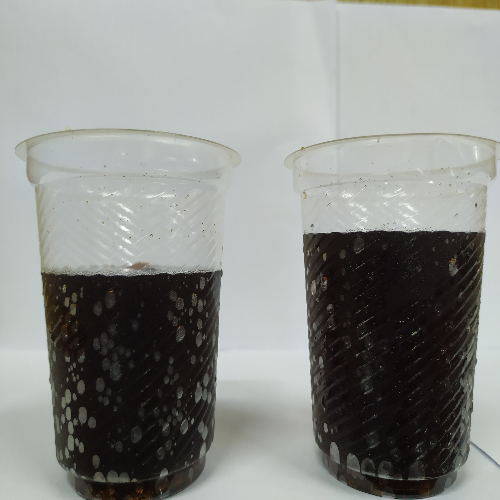

(500, 500, 3)

In [422]:
coke=cv2.imread('/content/coke.jpg')
coke=cv2.resize(coke, (500,500))
cv2_imshow(coke)
coke.shape

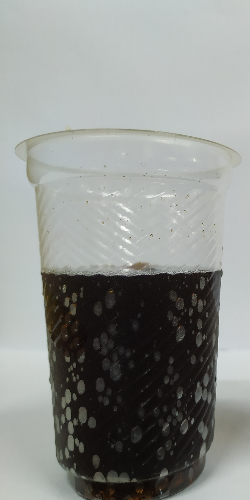

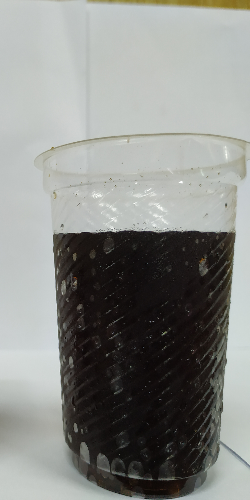

In [428]:
half= coke.copy()[:,:250]
cv2_imshow(half)

full=coke.copy()[:,250:]
cv2_imshow(full)

 Accuracy:  0.8056504130363464 
 Location:  (0, 0)


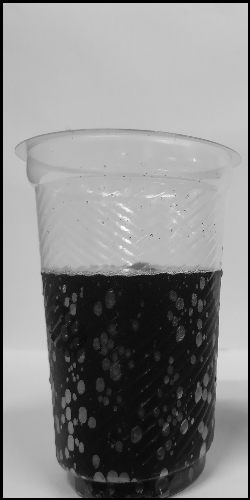

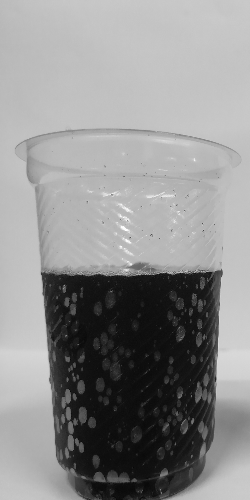

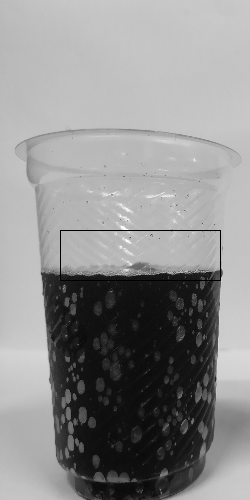

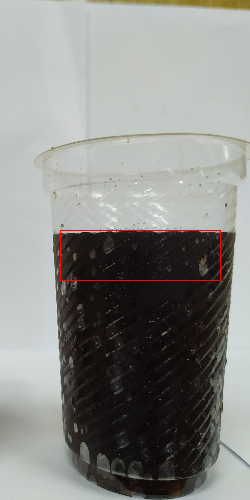

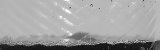

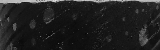

 Accuracy(Template_Matching):  0.11890796571969986
 Accuracy(GrayScale Histogram Matching):  0.019667378609561133
 Average Accuracy:  0.0692876721646305
Fail


In [431]:
main_execution(half.copy(), full.copy(), (60,230), (220,280), 250, 500)

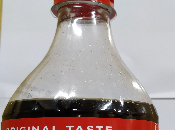

(130, 175, 3)


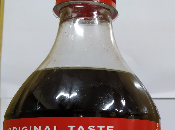

In [326]:
test_coke=cv2.imread('/content/IMG_20191009_124710.jpg')
test_coke=cv2.resize(test_coke, (300,300))[20:150, 5:180]
cv2_imshow(test_coke)

print(test_coke.shape)

full_coke=cv2.imread('/content/IMG_20191009_124731.jpg')[:,:]
full_coke=cv2.resize(full_coke, (300,300))[20:150, 5:180]
cv2_imshow(full_coke)


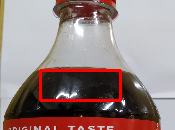

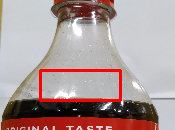

In [327]:
cv2_imshow(cv2.rectangle(full_coke.copy(), (40, 70), (120,100), (0,0,255), 2))
cv2_imshow(cv2.rectangle(test_coke.copy(), (40, 70), (120,100), (0,0,255), 2))

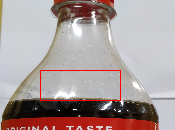

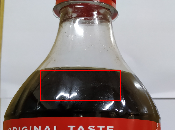

 Accuracy(Template_Matching):  0.4846284091472626
 Accuracy(GrayScale Histogram Matching):  -0.10123340243783809
 Average Accuracy:  0.19169750335471225
Fail


In [328]:
main_execution(test_coke.copy(), full_coke.copy(), (40,70), (120,100))

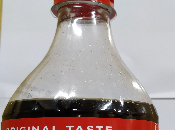

(130, 175, 3)


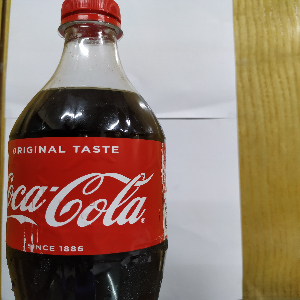

In [409]:
test_coke=cv2.imread('/content/IMG_20191009_124710.jpg')
test_coke=cv2.resize(test_coke, (300,300))[20:150, 5:180]
cv2_imshow(test_coke)

print(test_coke.shape)

full_coke=cv2.imread('/content/IMG_20191009_124731.jpg')
full_coke=cv2.resize(full_coke, (300,300))
cv2_imshow(full_coke)


 Accuracy:  0.7492675185203552 
 Location:  (7, 20)


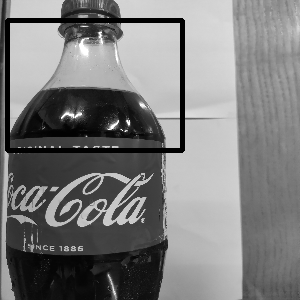

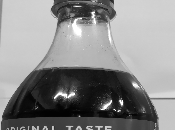

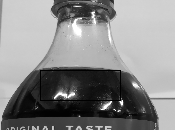

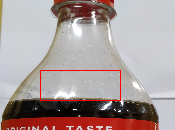

 Accuracy(Template_Matching):  0.5478230118751526
 Accuracy(GrayScale Histogram Matching):  -0.10116184198516112
 Average Accuracy:  0.22333058494499575
Fail


In [412]:
main_execution(full_coke, test_coke, (40,70), (120,100), 175, 130)

# Cap level


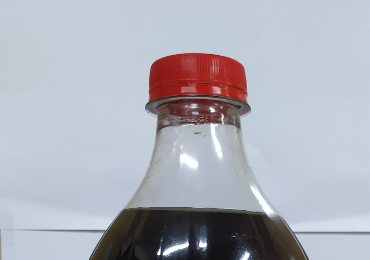

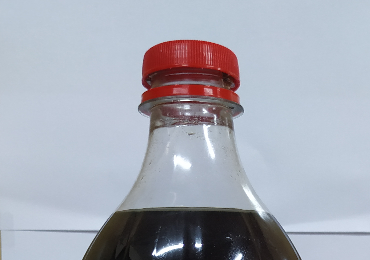

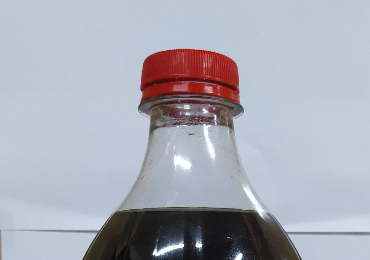

In [345]:
fully_closed=cv2.imread('/content/Fully closed.jpg')
fully_closed= cv2.resize(fully_closed, (800, 800))[40: 300, 130:500]
cv2_imshow(fully_closed)


wide_open=cv2.imread('/content/wide open.jpg')
wide_open= cv2.resize(wide_open, (800, 800))[40: 300, 130:500]
cv2_imshow(wide_open)


almost_closed=cv2.imread('/content/almost closed.jpg')
almost_closed= cv2.resize(almost_closed, (800, 800))[40: 300, 130:500]
cv2_imshow(almost_closed)

In [334]:
fully_closed.shape

(260, 370, 3)

 Accuracy:  0.8814594745635986 
 Location:  (0, 0)


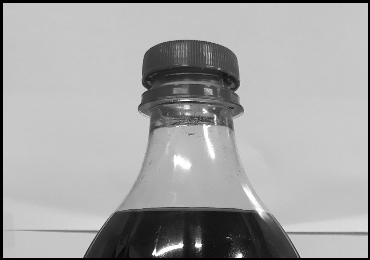

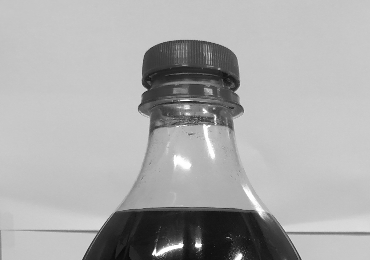

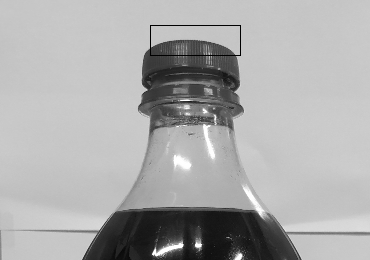

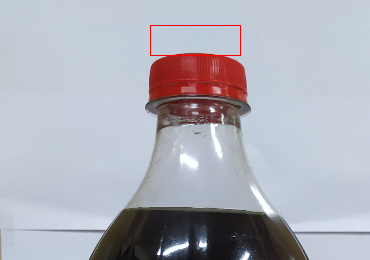

 Accuracy(Template_Matching):  0.17623811960220337
 Accuracy(GrayScale Histogram Matching):  -0.009001046670445172
 Average Accuracy:  0.08361853646587909
Fail


In [433]:
main_execution(wide_open.copy(), fully_closed.copy(), (150, 25), (240, 55), 370, 260)

 Accuracy:  0.9025713205337524 
 Location:  (0, 0)


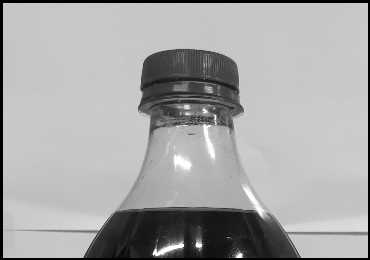

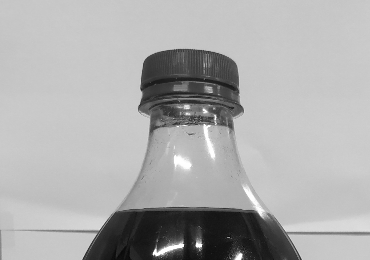

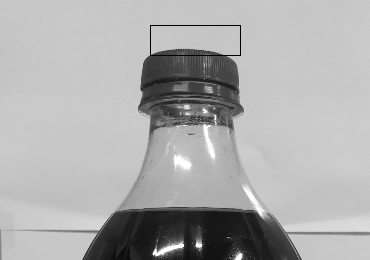

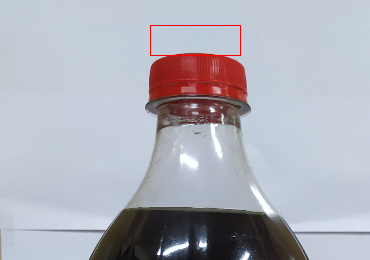

 Accuracy(Template_Matching):  0.4237818121910095
 Accuracy(GrayScale Histogram Matching):  -0.0019944190115896462
 Average Accuracy:  0.21089369658970994
Fail


In [434]:
main_execution(almost_closed.copy(), fully_closed.copy(), (150, 25), (240, 55), 370, 260)

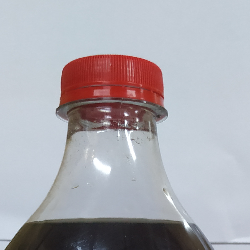

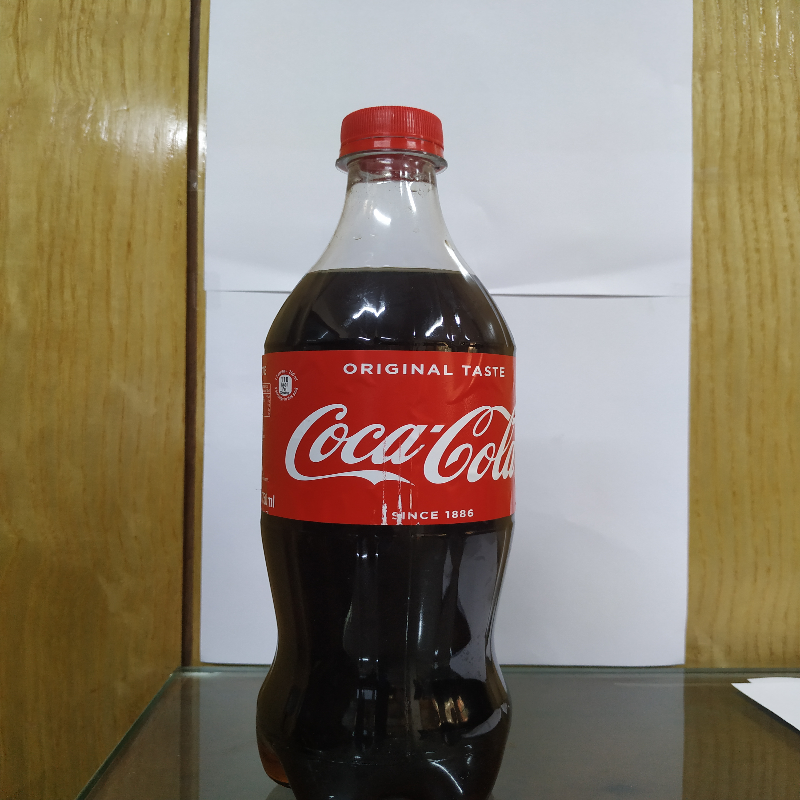

In [382]:
closed_cap1=cv2.imread('/content/cap1.jpg')
closed_cap1=cv2.resize(closed_cap1, (800,800))[50: 300, 250:500]
cv2_imshow(closed_cap1)

closed_cap2=cv2.imread('/content/cap2.jpg')
closed_cap2=cv2.resize(closed_cap2, (800,800))
cv2_imshow(closed_cap2)

In [436]:
closed_cap1.shape

(250, 250, 3)

 Accuracy:  0.9858831167221069 
 Location:  (280, 51)


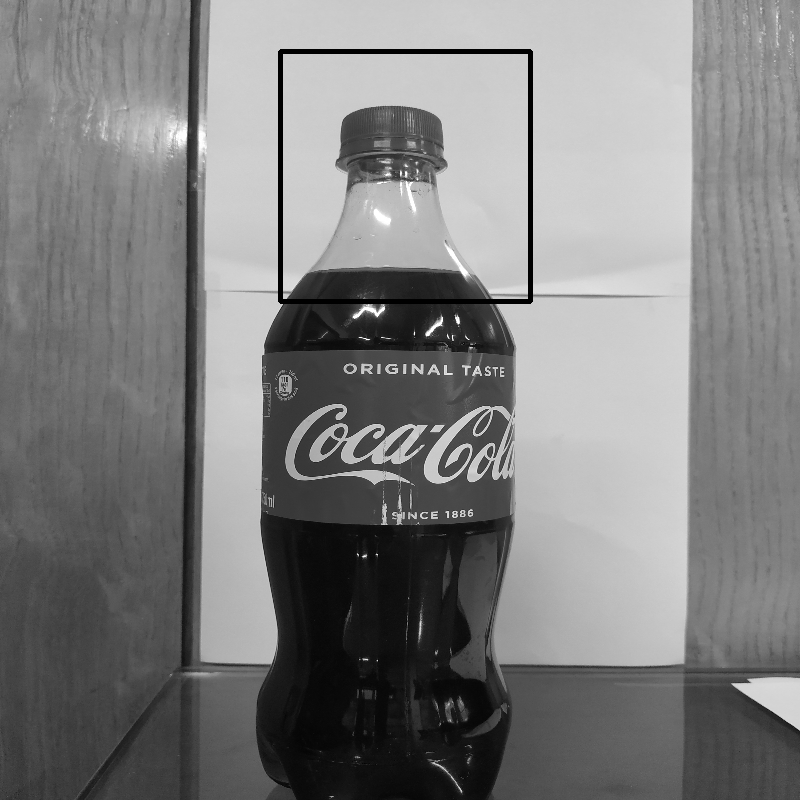

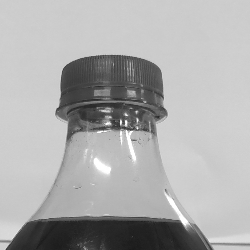

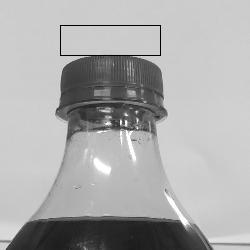

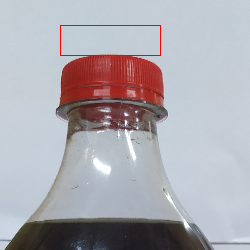

 Accuracy(Template_Matching):  0.4788123667240143
 Accuracy(GrayScale Histogram Matching):  0.771433636325047
 Average Accuracy:  0.6251230015245306
Pass


In [437]:
main_execution(closed_cap2, closed_cap1, (60, 25), (160, 55), 250, 250 )